In [49]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# 여러개의 범주형 자료 → 가변수 생성
df = pd.DataFrame({"m_id": [1, 2, 3, 4, 5],
                   "m_gen": ["rock", "rock", "pop", "disco", "pop"]},
                  columns=["m_id", "m_gen"])

In [3]:
df

,m_id,m_gen
0,1,rock
1,2,rock
2,3,pop
3,4,disco
4,5,pop


In [4]:
mm = pd.get_dummies(df["m_id"])
mm

,1,2,3,4,5
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [8]:
mm = pd.get_dummies(df['m_gen'])
mm

,disco,pop,rock
0,0,0,1
1,0,0,1
2,0,1,0
3,1,0,0
4,0,1,0


In [7]:
mm = df.join(mm.add_prefix("genre_")) # 접두어를 생성하여 join
mm

,m_id,m_gen,genre_disco,genre_pop,genre_rock
0,1,rock,0,0,1
1,2,rock,0,0,1
2,3,pop,0,1,0
3,4,disco,1,0,0
4,5,pop,0,1,0


## MNIST

In [21]:
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [22]:
mnist = input_data.read_data_sets("./res/MNIST_data/", one_hot=True)

Extracting ./res/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./res/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./res/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./res/MNIST_data/t10k-labels-idx1-ubyte.gz


5만개 train 이미지(입력, 레이블) → 모델 <br>
1만개 test 이미지 → 모델 → 출력 결과 정확도 확인

In [73]:
nb_classes = 10 # 분류결과의 종류 개수

In [74]:
x = tf.placeholder(tf.float32, [None, 28*28])
y = tf.placeholder(tf.float32, [None, nb_classes])
w = tf.Variable(tf.random_normal([28*28, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))
hf= tf.nn.softmax(tf.matmul(x, w)+b)
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf), axis=1))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
is_correct = tf.equal(tf.arg_max(hf, 1), tf.arg_max(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
# 에폭 : 전체 데이터를 1번 트레이닝 → 1 에폭
training_epochs = 15 # 15번 학습
batch_size = 100 # 한번에 학습할 데이터 크기

Epoch    1 cost: 2.782539983
Epoch    2 cost: 1.145379660
Epoch    3 cost: 0.907995003
Epoch    4 cost: 0.796263846
Epoch    5 cost: 0.725168954
Epoch    6 cost: 0.673101274
Epoch    7 cost: 0.636264582
Epoch    8 cost: 0.604817065
Epoch    9 cost: 0.578997736
Epoch   10 cost: 0.558487084
Epoch   11 cost: 0.539195485
Epoch   12 cost: 0.523211108
Epoch   13 cost: 0.508411059
Epoch   14 cost: 0.496989780
Epoch   15 cost: 0.483461856
Learning finished
accuracy 0.8917
Label: [0]
prediction: [0]


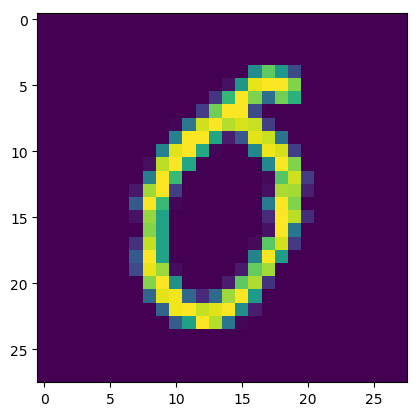

In [76]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs): # 5만 개 이미지 15번 트레이닝
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)  # 5만 / 100
        for i in range(total_batch): # 500 번
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) # 다음 배치를 알아서 읽음
            cv, _ = sess.run([cost, train], feed_dict={x: batch_xs, y: batch_ys})
            avg_cost += cv/total_batch # 100개 데이터에 대한 코스트/500 → cost의 평균
            # 1, 3, 7, 10, 14 : 평균 35/5 = 7
            # 0.2+0.6+1.4+2+2.8 = 7
        # 에폭 때마다 cost 출력
        print("Epoch %4d" % (epoch+1), 
             "cost: {:.9f}".format(avg_cost))
    print("Learning finished")

    print("accuracy", sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
    r = random.randint(0, mnist.test.num_examples-1) # 테스트를 하고자하는 이미지 랜덤 선택
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("prediction:", sess.run(tf.argmax(hf, 1), feed_dict={x: mnist.test.images[r:r+1]}))
    plt.style.use("default")
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28))
    plt.show()

## XOR 분류기

In [39]:
xdata =[[0, 0], [0, 1], [1, 0], [1, 1]]
ydata = [[0], [1], [1], [0]]

In [52]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])
w = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))
hf = tf.sigmoid(tf.matmul(x, w)+b)
cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predict = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))

In [54]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x: xdata, y: ydata})
        if step%100 == 0:
            print(step, sess.run(cost, feed_dict={x : xdata, y: ydata}),
                 sess.run(w))
    hv, pv, av = sess.run([hf, predict, accuracy], feed_dict={x: xdata, y: ydata})
    print("hf\n", hv, "\npre", pv, "\nacc", av)

0 1.2158568 [[-0.2247671 ]
 [-0.34134668]]
100 0.7017315 [[0.3682344 ]
 [0.30010813]]
200 0.6969496 [[0.25604627]
 [0.2196242 ]]
300 0.69488347 [[0.17071709]
 [0.15125553]]
400 0.69393873 [[0.1139401 ]
 [0.10354248]]
500 0.69350785 [[0.07619791]
 [0.07064308]]
600 0.6933115 [[0.05104736]
 [0.04807984]]
700 0.69322205 [[0.03424858]
 [0.03266327]]
800 0.6931813 [[0.02300569]
 [0.02215879]]
900 0.6931627 [[0.01546864]
 [0.01501621]]
1000 0.6931542 [[0.010409  ]
 [0.01016731]]
1100 0.6931504 [[0.0070087 ]
 [0.00687961]]
1200 0.6931487 [[0.00472153]
 [0.00465256]]
1300 0.69314784 [[0.00318203]
 [0.00314517]]
1400 0.6931475 [[0.00214516]
 [0.00212547]]
1500 0.69314736 [[0.00144652]
 [0.00143601]]
1600 0.6931473 [[0.00097562]
 [0.00096999]]
1700 0.69314724 [[0.00065806]
 [0.00065507]]
1800 0.6931472 [[0.00044403]
 [0.00044243]]
1900 0.6931472 [[0.00029958]
 [0.00029873]]
2000 0.6931472 [[0.00020214]
 [0.00020168]]
2100 0.6931472 [[0.0001364 ]
 [0.00013614]]
2200 0.6931472 [[9.203589e-05]
 [9.

### NN 으로 재구성

In [56]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

w1 = tf.Variable(tf.random_normal([2, 2]))
b1 = tf.Variable(tf.random_normal([2]))
L1 = tf.sigmoid(tf.matmul(x, w1)+b1)

w2 = tf.Variable(tf.random_normal([2, 1]))
b2 = tf.Variable(tf.random_normal([1]))
hf = tf.sigmoid(tf.matmul(L1, w2)+b2)

cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predict = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))

In [61]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x: xdata, y: ydata})
        if step%100 == 0:
            print("Step", step, "cost", sess.run(cost, feed_dict={x : xdata, y: ydata}),
                 sess.run(w1), sess.run(w2))
    hv, pv, av = sess.run([hf, predict, accuracy], feed_dict={x: xdata, y: ydata})
    print("hf\n", hv, "\npre\n", pv, "\nacc", av)
    print("bias", sess.run(b1), sess.run(b2))

Step 0 cost 0.7150096 [[-0.06941011  0.17842817]
 [-0.9415158  -1.1356446 ]] [[ 0.07614742]
 [-0.30379725]]
Step 100 cost 0.6940909 [[-0.06935269  0.15178372]
 [-0.94225574 -1.116329  ]] [[-0.01682661]
 [-0.37786907]]
Step 200 cost 0.69380677 [[-0.07141014  0.11326114]
 [-0.9422161  -1.1065173 ]] [[-0.02099586]
 [-0.35858867]]
Step 300 cost 0.69361514 [[-0.07361941  0.07577328]
 [-0.9422165  -1.0995075 ]] [[-0.02118803]
 [-0.33911702]]
Step 400 cost 0.6934533 [[-0.07584715  0.03956899]
 [-0.9422362  -1.0945402 ]] [[-0.02149208]
 [-0.32374227]]
Step 500 cost 0.69331175 [[-0.07811547  0.00424891]
 [-0.9422722  -1.0912992 ]] [[-0.02202494]
 [-0.31244418]]
Step 600 cost 0.6931823 [[-0.08044566 -0.0306065 ]
 [-0.94232327 -1.0895727 ]] [[-0.02271644]
 [-0.30507395]]
Step 700 cost 0.6930581 [[-0.08285116 -0.06541964]
 [-0.9423885  -1.0892279 ]] [[-0.02349184]
 [-0.30154833]]
Step 800 cost 0.69293237 [[-0.0853373  -0.10062493]
 [-0.9424666  -1.0902014 ]] [[-0.02427829]
 [-0.30185416]]
Step 900

Step 7900 cost 0.04555957 [[-3.9532082 -6.0510006]
 [-3.9746046 -6.2336736]] [[ 7.910554]
 [-8.692367]]
Step 8000 cost 0.043727156 [[-3.9878733 -6.070501 ]
 [-4.009014  -6.2498527]] [[ 7.98897 ]
 [-8.754791]]
Step 8100 cost 0.042027898 [[-4.0210752 -6.0893183]
 [-4.0419726 -6.2655163]] [[ 8.064522]
 [-8.815399]]
Step 8200 cost 0.040448453 [[-4.052917  -6.1074963]
 [-4.073581  -6.2806926]] [[ 8.137401]
 [-8.874286]]
Step 8300 cost 0.03897693 [[-4.083495  -6.125073 ]
 [-4.1039357 -6.2954097]] [[ 8.207779]
 [-8.931538]]
Step 8400 cost 0.037603114 [[-4.1128964 -6.1420846]
 [-4.1331224 -6.3096933]] [[ 8.275812]
 [-8.987241]]
Step 8500 cost 0.036317937 [[-4.1411977 -6.1585636]
 [-4.1612177 -6.323566 ]] [[ 8.341644]
 [-9.04147 ]]
Step 8600 cost 0.035113327 [[-4.168471  -6.17454  ]
 [-4.1882925 -6.3370495]] [[ 8.405407]
 [-9.094297]]
Step 8700 cost 0.03398224 [[-4.1947813 -6.190042 ]
 [-4.21441   -6.350164 ]] [[ 8.467218]
 [-9.145788]]
Step 8800 cost 0.032918297 [[-4.220186  -6.2050953]
 [-4.2

In [63]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

w1 = tf.Variable(tf.random_normal([2, 10]))
b1 = tf.Variable(tf.random_normal([10]))
L1 = tf.sigmoid(tf.matmul(x, w1)+b1)

w2 = tf.Variable(tf.random_normal([10, 1]))
b2 = tf.Variable(tf.random_normal([1]))
hf = tf.sigmoid(tf.matmul(L1, w2)+b2)

cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predict = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))

In [66]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x: xdata, y: ydata})
        if step%100 == 0:
            print("Step", step, "cost", sess.run(cost, feed_dict={x : xdata, y: ydata}))
    hv, pv, av = sess.run([hf, predict, accuracy], feed_dict={x: xdata, y: ydata})
#     print("hf\n", hv, "\npre\n", pv, "\nacc", av)
    print("hf\n", hv, "\npre\n", pv, "\nacc", av)
    print("bias", sess.run(b1), sess.run(b2))

Step 0 cost 0.79134715
Step 100 cost 0.6898974
Step 200 cost 0.6747861
Step 300 cost 0.6596863
Step 400 cost 0.6427167
Step 500 cost 0.62273157
Step 600 cost 0.5990296
Step 700 cost 0.5711899
Step 800 cost 0.5390243
Step 900 cost 0.5026497
Step 1000 cost 0.46261314
Step 1100 cost 0.41996863
Step 1200 cost 0.37621439
Step 1300 cost 0.333064
Step 1400 cost 0.2921316
Step 1500 cost 0.25465426
Step 1600 cost 0.22134987
Step 1700 cost 0.19243032
Step 1800 cost 0.1677221
Step 1900 cost 0.14682102
Step 2000 cost 0.12922536
Step 2100 cost 0.11442533
Step 2200 cost 0.10195317
Step 2300 cost 0.09140291
Step 2400 cost 0.08243406
Step 2500 cost 0.07476668
Step 2600 cost 0.06817297
Step 2700 cost 0.062468383
Step 2800 cost 0.057503693
Step 2900 cost 0.05315817
Step 3000 cost 0.049333405
Step 3100 cost 0.045949325
Step 3200 cost 0.042940244
Step 3300 cost 0.04025203
Step 3400 cost 0.037839875
Step 3500 cost 0.035666298
Step 3600 cost 0.033700116
Step 3700 cost 0.03191502
Step 3800 cost 0.030288655
S

In [68]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

w1 = tf.Variable(tf.random_normal([2, 10]))
b1 = tf.Variable(tf.random_normal([10]))
L1 = tf.sigmoid(tf.matmul(x, w1)+b1)

w2 = tf.Variable(tf.random_normal([10, 10]))
b2 = tf.Variable(tf.random_normal([10]))
L2 = tf.sigmoid(tf.matmul(L1, w2)+b2)

w3 = tf.Variable(tf.random_normal([10, 10]))
b3 = tf.Variable(tf.random_normal([10]))
L3 = tf.sigmoid(tf.matmul(L2, w3)+b3)

w4 = tf.Variable(tf.random_normal([10, 1]))
b4 = tf.Variable(tf.random_normal([1]))
hf = tf.sigmoid(tf.matmul(L3, w4)+b4)

cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predict = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))

In [69]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x: xdata, y: ydata})
        if step%100 == 0:
            print("Step", step, "cost", sess.run(cost, feed_dict={x : xdata, y: ydata}))
    hv, pv, av = sess.run([hf, predict, accuracy], feed_dict={x: xdata, y: ydata})
#     print("hf\n", hv, "\npre\n", pv, "\nacc", av)
    print("hf\n", hv, "\npre\n", pv, "\nacc", av)
    print("bias", sess.run(b1), sess.run(b2))

Step 0 cost 1.0466444
Step 100 cost 0.6947388
Step 200 cost 0.69427556
Step 300 cost 0.69385993
Step 400 cost 0.6934739
Step 500 cost 0.6931021
Step 600 cost 0.6927302
Step 700 cost 0.6923446
Step 800 cost 0.69193095
Step 900 cost 0.69147336
Step 1000 cost 0.6909522
Step 1100 cost 0.69034314
Step 1200 cost 0.68961394
Step 1300 cost 0.68872064
Step 1400 cost 0.6876015
Step 1500 cost 0.68616796
Step 1600 cost 0.6842892
Step 1700 cost 0.68176734
Step 1800 cost 0.67829144
Step 1900 cost 0.67335856
Step 2000 cost 0.6661247
Step 2100 cost 0.6551393
Step 2200 cost 0.63788456
Step 2300 cost 0.6101165
Step 2400 cost 0.56552166
Step 2500 cost 0.49781865
Step 2600 cost 0.4083906
Step 2700 cost 0.3130074
Step 2800 cost 0.230959
Step 2900 cost 0.16993967
Step 3000 cost 0.1274937
Step 3100 cost 0.098361924
Step 3200 cost 0.07808703
Step 3300 cost 0.06362111
Step 3400 cost 0.053013407
Step 3500 cost 0.045027565
Step 3600 cost 0.03887002
Step 3700 cost 0.03401978
Step 3800 cost 0.03012671
Step 3900 co

In [70]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

w1 = tf.Variable(tf.random_normal([2, 10]))
b1 = tf.Variable(tf.random_normal([10]))
L1 = tf.sigmoid(tf.matmul(x, w1)+b1)

w2 = tf.Variable(tf.random_normal([10, 10]))
b2 = tf.Variable(tf.random_normal([10]))
L2 = tf.sigmoid(tf.matmul(L1, w2)+b2)

w3 = tf.Variable(tf.random_normal([10, 10]))
b3 = tf.Variable(tf.random_normal([10]))
L3 = tf.sigmoid(tf.matmul(L2, w3)+b3)

w4 = tf.Variable(tf.random_normal([10, 10]))
b4 = tf.Variable(tf.random_normal([10]))
L4 = tf.sigmoid(tf.matmul(L3, w4)+b4)

w5 = tf.Variable(tf.random_normal([10, 10]))
b5 = tf.Variable(tf.random_normal([10]))
L5 = tf.sigmoid(tf.matmul(L4, w5)+b5)

w6 = tf.Variable(tf.random_normal([10, 10]))
b6 = tf.Variable(tf.random_normal([10]))
L6 = tf.sigmoid(tf.matmul(L5, w6)+b6)

w7 = tf.Variable(tf.random_normal([10, 10]))
b7 = tf.Variable(tf.random_normal([10]))
L7 = tf.sigmoid(tf.matmul(L6, w7)+b7)

w8 = tf.Variable(tf.random_normal([10, 10]))
b8 = tf.Variable(tf.random_normal([10]))
L8 = tf.sigmoid(tf.matmul(L7, w8)+b8)

w9 = tf.Variable(tf.random_normal([10, 10]))
b9 = tf.Variable(tf.random_normal([10]))
L9 = tf.sigmoid(tf.matmul(L8, w9)+b9)

w10 = tf.Variable(tf.random_normal([10, 1]))
b10 = tf.Variable(tf.random_normal([1]))
hf = tf.sigmoid(tf.matmul(L9, w10)+b10)

cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predict = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))

In [71]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x: xdata, y: ydata})
        if step%100 == 0:
            print("Step", step, "cost", sess.run(cost, feed_dict={x : xdata, y: ydata}))
    hv, pv, av = sess.run([hf, predict, accuracy], feed_dict={x: xdata, y: ydata})
    print("hf\n", hv, "\npre\n", pv, "\nacc", av)
    print("bias", sess.run(b1), sess.run(b2))

Step 0 cost 0.84387153
Step 100 cost 0.69313806
Step 200 cost 0.6931379
Step 300 cost 0.69313776
Step 400 cost 0.6931376
Step 500 cost 0.6931374
Step 600 cost 0.69313717
Step 700 cost 0.69313705
Step 800 cost 0.69313693
Step 900 cost 0.6931367
Step 1000 cost 0.69313645
Step 1100 cost 0.6931364
Step 1200 cost 0.6931362
Step 1300 cost 0.6931359
Step 1400 cost 0.69313586
Step 1500 cost 0.6931357
Step 1600 cost 0.6931355
Step 1700 cost 0.6931353
Step 1800 cost 0.6931351
Step 1900 cost 0.693135
Step 2000 cost 0.69313484
Step 2100 cost 0.6931346
Step 2200 cost 0.6931344
Step 2300 cost 0.6931341
Step 2400 cost 0.693134
Step 2500 cost 0.6931339
Step 2600 cost 0.6931336
Step 2700 cost 0.6931335
Step 2800 cost 0.69313335
Step 2900 cost 0.6931331
Step 3000 cost 0.693133
Step 3100 cost 0.69313276
Step 3200 cost 0.6931326
Step 3300 cost 0.69313234
Step 3400 cost 0.69313216
Step 3500 cost 0.69313204
Step 3600 cost 0.6931318
Step 3700 cost 0.6931316
Step 3800 cost 0.69313145
Step 3900 cost 0.69313127